In [ ]:
using Pkg
Pkg.activate("..") ## because we have environment files in the parent directory
Pkg.instantiate() ## to download all missing packages


In [ ]:
# load some packages we will need today
using Plots, Calculus, Optim, ForwardDiff

In [73]:


# production function
function prod_function(K,L,α,γ,ρ,A)
    Y = A * ( α * K ^ ρ + (1 - α) * L ^ ρ ) ^ (γ/ρ)
    return Y
end

# write in different way to make it easier to use with Optim
prod_function_small(x,params) = prod_function(x[1],x[2],params.α,params.γ,params.ρ,params.A)

ps = (α = 0.3, γ = 0.5, ρ = 0.5, A = 1.0)

prod_function_small([1.0,1.0],ps)

# once we have parameter values, we can wrap it again
prod_function_wrapped(x) = prod_function_small(x,ps)
prod_function_wrapped([1.0,1.0])

1.0

In [ ]:
grid = collect(0:0.1:3);  

# plot it to see what happens
plot(grid,grid,(K,L)->prod_function_wrapped([K, L]),st=:surface,camera=(50,50))

In [ ]:
function profit_function(K,L,α,γ,ρ,A,p,w,r)
    Y = prod_function(K,L,α,γ,ρ,A)
    profit = p*Y - w * L - r * K
    return profit
end

In [ ]:
function profit_function_small(x,params,p,w,r)
    profit = profit_function(x[1],x[2],params.α,params.γ,params.ρ,params.A,p,w,r)
    return profit
end

In [79]:
# maximize profits for some given prices and wages
ps = (α = 0.3, γ = 0.5, ρ = 0.5, A = 1.0)
p = 5.0
w = 1.0
r = 1.0
profit_function_wrapped(x) = profit_function_small(x,ps,p,w,r)
profit_function_wrapped([1.0,1.0])

3.0

In [80]:
# what happens here?
x0 = [1.0,1.0]
res_descent = optimize(x-> -profit_function_wrapped(x), x0, GradientDescent(), Optim.Options(store_trace=true, extended_trace=true, iterations = 5000))

DomainError: DomainError with -0.24999394494167518:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

In [81]:
# do it in a different way!
x0 = [1.0, 1.0]
lower = [0, 0]
upper = [Inf, Inf]
inner_optimizer = GradientDescent()
res_descent = optimize(x-> -profit_function_wrapped(x),lower, upper, x0, Fminbox(inner_optimizer))

 * Status: success

 * Candidate solution
    Final objective value:     -3.625000e+00

 * Found with
    Algorithm:     Fminbox with Gradient Descent

 * Convergence measures
    |x - x'|               = 1.23e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.96e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.58e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    4
    f(x) calls:    95
    ∇f(x) calls:   95


In [82]:
function demand_for_labor(ps,p,w,r)
    profit_function_wrapped(x) = profit_function_small(x,ps,p,w,r)
    x0 = [1.0, 1.0]
    lower = [0.0000, 0.0000]
    upper = [Inf, Inf]
    inner_optimizer = GradientDescent()
    res_descent = optimize(x-> -profit_function_wrapped(x),lower, upper, x0, Fminbox(inner_optimizer))
    return res_descent.minimizer[2]
end

demand_for_labor (generic function with 1 method)

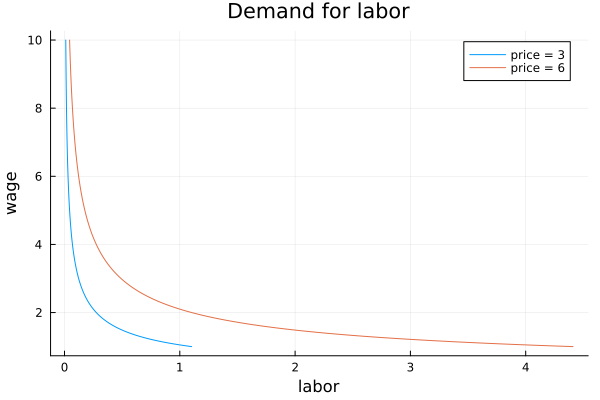

In [83]:
p1 = 3
p2 = 6
demand_for_labor_wrapped1(w) = demand_for_labor(ps,p1,w,r)
demand_for_labor_wrapped2(w) = demand_for_labor(ps,p2,w,r)
# notice y vs x axis -- as in your intro to micro classes!
w_range = 1:0.02:10
plot(demand_for_labor_wrapped1.(w_range),w_range,title = "Demand for labor",xlabel = "labor",ylabel = "wage",label = "price = $p1")
plot!(demand_for_labor_wrapped2.(w_range),w_range,title = "Demand for labor",xlabel = "labor",ylabel = "wage",label = "price = $p2")